# About this file

Code contains two experiment 4.3 and 4.4 which are NN experiments to find out the playing team in a match

# Importing Libraries

In [1]:
from keras.models import Model, Sequential
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Lambda
from keras.layers.core import Dense
from keras.layers import Flatten, Input
from keras.utils import plot_model
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import seaborn as sns

Using TensorFlow backend.


# 1. Reading File

In [2]:
file_name = "E:\\MS DA\\Major Project Nuig\\complete_zones_counts.csv"
zone_details = pd.read_csv(file_name)
zone_details.head()

,team_a_zone_1_count,team_a_zone_2_count,team_a_zone_3_count,team_a_zone_4_count,team_a_zone_5_count,team_a_zone_6_count,team_a_zone_7_count,team_a_zone_8_count,team_a_zone_9_count,team_b_zone_1_count,...,team_b_zone_3_count,team_b_zone_4_count,team_b_zone_5_count,team_b_zone_6_count,team_b_zone_7_count,team_b_zone_8_count,team_b_zone_9_count,match_id,teama,teamb
0,1580,1500,1999,3736,2596,4196,1483,882,1228,3732,...,1927,5115,1932,4092,1090,1272,1557,987592,Bournemouth,Cardiff City
1,2493,2177,1747,1095,934,1970,1052,581,438,1643,...,2683,4325,3729,4279,2535,4132,2499,987593,Arsenal,Manchester City
2,1520,1058,1151,4008,3713,3684,1493,2556,1287,1018,...,960,1816,2622,3022,1445,4238,2906,987594,Fulham,Crystal Palace
3,958,653,1245,1397,1527,1808,2049,3871,1464,1787,...,987,3878,4309,4407,2851,5955,3840,987595,Huddersfield Town,Chelsea
4,1510,1942,1752,3270,3211,3938,1275,1877,1869,382,...,1206,2211,3448,2942,2407,6293,2509,987596,Liverpool,West Ham United


# 2. Teams Prediction

## 2.1. For 18 Zones

In [3]:
#Sliting the data into test and train data
from sklearn.model_selection import train_test_split
X_train_18, X_test_18, y_train_18, y_test_18 = train_test_split(zone_details[zone_details.columns.tolist()[0:-3]], zone_details[["teama", "teamb"]], test_size=0.1, random_state=100)

In [4]:
training_18_data_variables = X_train_18
testing_18_data_variables = X_test_18

In [5]:
training_18_data_variables[["team_a_zone_1_count", "team_a_zone_2_count", "team_a_zone_3_count", "team_a_zone_4_count", "team_a_zone_5_count", "team_a_zone_6_count", "team_a_zone_7_count", "team_a_zone_8_count", "team_a_zone_9_count"]].values

array([[ 979, 1591,  747, ...,  899,  598,  341],
       [1583, 1192, 1008, ...,  815, 2063, 1302],
       [1351, 1489,  846, ..., 1073,  870,  776],
       ...,
       [ 651,  310,  564, ...,  443,  912,  540],
       [1153, 1319,  928, ..., 1565, 1741, 1617],
       [1910, 1596, 1027, ..., 1210, 1533, 1331]], dtype=int64)

In [6]:
#Creating a list of team names for one-hot encoding.
teams_list = list(set(list(set(zone_details.teama)) + list(set(zone_details.teamb))))
teams_list_dict = {j: teams_list[j] for j in range(len(teams_list))}
teams_list_dict

{0: 'Bournemouth',
 1: 'Manchester City',
 2: 'Tottenham Hotspur',
 3: 'Leicester City',
 4: 'Burnley',
 5: 'Chelsea',
 6: 'Huddersfield Town',
 7: 'Cardiff City',
 8: 'Brighton and Hove Albion',
 9: 'Southampton',
 10: 'Liverpool',
 11: 'Manchester United',
 12: 'Arsenal',
 13: 'Newcastle United',
 14: 'Crystal Palace',
 15: 'Fulham',
 16: 'Wolverhampton Wanderers',
 17: 'Everton',
 18: 'Watford',
 19: 'West Ham United'}

In [7]:
#Spliting the teams.
training_data_labels = y_train_18
label_1_numbers = []
label_2_numbers = []

for i in training_data_labels["teama"]:
    for k,v in teams_list_dict.items():
        if (i == v):
            label_1_numbers.append(k)

for i in training_data_labels["teamb"]:
    for k,v in teams_list_dict.items():
        if (i == v):
            label_2_numbers.append(k)

In [8]:
testing_data_labels = y_test_18
label_3_numbers = []
label_4_numbers = []

for i in testing_data_labels["teama"]:
    for k,v in teams_list_dict.items():
        if (i == v):
            label_3_numbers.append(k)

for i in testing_data_labels["teamb"]:
    for k,v in teams_list_dict.items():
        if (i == v):
            label_4_numbers.append(k)

In [9]:
#Converting the teams into one-hot vector.
training_data_label_1 = keras.utils.to_categorical(label_1_numbers, len(teams_list_dict))
training_data_label_2 = keras.utils.to_categorical(label_2_numbers, len(teams_list_dict))

In [10]:
testing_data_label_1 = keras.utils.to_categorical(label_3_numbers, len(teams_list_dict))
testing_data_label_2 = keras.utils.to_categorical(label_4_numbers, len(teams_list_dict))
print(len(testing_data_label_1), len(testing_data_label_2))

21 21


In [11]:
#Defining the Model
Input_18= Input(shape=(18, ))

x_18 = Dense(16, activation='relu')(Input_18)
x_18 = Dense(16, activation='relu')(x_18)

out_18_1 = Dense(20,  activation='softmax')(x_18)
out_18_2 = Dense(20,  activation='softmax')(x_18)

model_18 = Model(inputs=Input_18, outputs=[out_18_1,out_18_2])
model_18.compile(optimizer = "rmsprop", loss = 'mse', metrics=['accuracy'])
model_18.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 18)           0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 16)           304         input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 16)           272         dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 20)           340         dense_2[0][0]                    
_____________________________________

In [12]:
(model_18.metrics_names)

['loss', 'dense_3_loss', 'dense_4_loss', 'dense_3_acc', 'dense_4_acc']

In [13]:
# training_18_data_variables.shape
training_18_data_variables.values

array([[ 979, 1591,  747, ..., 2439, 2161, 2058],
       [1583, 1192, 1008, ..., 2461, 3951, 2295],
       [1351, 1489,  846, ..., 1624, 1960,  663],
       ...,
       [ 651,  310,  564, ..., 1627, 2845, 1499],
       [1153, 1319,  928, ..., 1088, 1255,  660],
       [1910, 1596, 1027, ..., 2981, 5660, 4132]], dtype=int64)

In [14]:
x_18 = training_18_data_variables
y_18 = [training_data_label_1, training_data_label_2]
print(len(training_data_label_1), len(training_data_label_2))

189 189


In [15]:
#Fitting the model
model_18_history = model_18.fit(x_18, y_18, epochs=5, batch_size=None)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
189/189 [==============================] - 1s 3ms/step - loss: 0.1888 - dense_3_loss: 0.0946 - dense_4_loss: 0.0942 - dense_3_acc: 0.0529 - dense_4_acc: 0.0582
Epoch 2/5
189/189 [==============================] - 0s 53us/step - loss: 0.1889 - dense_3_loss: 0.0947 - dense_4_loss: 0.0942 - dense_3_acc: 0.0529 - dense_4_acc: 0.0582
Epoch 3/5
189/189 [==============================] - 0s 69us/step - loss: 0.1887 - dense_3_loss: 0.0945 - dense_4_loss: 0.0942 - dense_3_acc: 0.0529 - dense_4_acc: 0.0582
Epoch 4/5
189/189 [==============================] - 0s 48us/step - loss: 0.1889 - dense_3_loss: 0.0947 - dense_4_loss: 0.0942 - dense_3_acc: 0.0529 - dense_4_acc: 0.0582
Epoch 5/5
189/189 [==============================] - 0s 53us/step - loss: 0.1889 - dense_3_loss: 0.0947 - dense_4_loss: 0.0942 - dense_3_acc: 0.0529 - dense_4_acc: 0.0582


In [20]:
#Evaluating the model
model_18.evaluate(testing_18_data_variables, [testing_data_label_1, testing_data_label_2], batch_size=None)

21/21 [==============================] - 0s 3ms/step


[0.1999998390674591, 0.09999984502792358, 0.09999999403953552, 0.0, 0.0]

In [21]:
#Testing the team predicted
r3 = model_18.predict(testing_18_data_variables[0:1], batch_size=None, verbose=0)

result_1_key_3 = np.where(r3[0][0] == np.max(r3[0][0]))[0][0]
result_2_key_3 = np.where(r3[1][0] == np.max(r3[1][0]))[0][0]
print("Actual: ", testing_data_labels[0:1])
print(result_1_key_3,result_2_key_3)
print("Predicted: ", teams_list_dict.get(result_1_key_3), teams_list_dict.get(result_2_key_3))

Actual:                 teama    teamb
165  Manchester City  Everton
8 14
Predicted:  Brighton and Hove Albion Crystal Palace


## 2.2. For 6 Zones

In [22]:
#Preparing the data for the 6 zones
zones_6_data = pd.DataFrame()
zones_6_details = []
for i in zone_details.iterrows():
    zones_6_details.append([i[1].match_id, i[1].team_a_zone_1_count + i[1].team_a_zone_2_count + i[1].team_a_zone_3_count, i[1].team_a_zone_4_count + i[1].team_a_zone_5_count + i[1].team_a_zone_6_count, i[1].team_a_zone_7_count + i[1].team_a_zone_8_count + i[1].team_a_zone_9_count, i[1].team_b_zone_1_count + i[1].team_b_zone_2_count + i[1].team_b_zone_3_count, i[1].team_b_zone_4_count + i[1].team_b_zone_5_count + i[1].team_b_zone_6_count,i[1].team_b_zone_7_count + i[1].team_b_zone_8_count + i[1].team_b_zone_9_count, i[1].teama, i[1].teamb])
    tmp = pd.DataFrame(zones_6_details, columns = ["match_id", "team_a_defence", "team_a_midfield", "team_a_attack", "team_b_defence", "team_b_mdfield", "team_b_attack", "teama", "teamb"])
    zones_6_data = pd.DataFrame.append(zones_6_data, tmp)

In [23]:
zones_6_data = zones_6_data.drop_duplicates()
zones_6_data.head()

,match_id,team_a_defence,team_a_midfield,team_a_attack,team_b_defence,team_b_mdfield,team_b_attack,teama,teamb
0,987592,5079,10528,3593,9234,11139,3919,Bournemouth,Cardiff City
1,987593,6417,3999,2071,7997,12333,9166,Arsenal,Manchester City
2,987594,3729,11405,5336,2888,7460,8589,Fulham,Crystal Palace
3,987595,2856,4732,7384,6048,12594,12646,Huddersfield Town,Chelsea
4,987596,5204,10419,5021,2134,8601,11209,Liverpool,West Ham United


In [24]:
#Splitting the data into test and train
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(zones_6_data[zones_6_data.columns.tolist()[1:-2]], zones_6_data[["teama", "teamb"]], test_size=0.1, random_state=100)

In [25]:
training_6_data_variables = X_train_6
training_6_data_labels = y_train_6

In [26]:
#Separting the home and away teams labels
label_5_numbers = []
label_6_numbers = []

for i in training_6_data_labels["teama"]:
    for k,v in teams_list_dict.items():
        if (i == v):
            label_5_numbers.append(k)     

for i in training_6_data_labels["teamb"]:
    for k,v in teams_list_dict.items():
        if (i == v):
            label_6_numbers.append(k)

In [27]:
#Converting the data into one-hot encoding
training_6_data_label_1 = keras.utils.to_categorical(label_5_numbers, len(teams_list_dict))
training_6_data_label_2 = keras.utils.to_categorical(label_6_numbers, len(teams_list_dict))

In [28]:
testing_6_data_labels = y_test_6
label_7_numbers = []
label_8_numbers = []

for i in testing_6_data_labels["teama"]:
    for k,v in teams_list_dict.items():
        if (i == v):
            label_7_numbers.append(k)

for i in testing_6_data_labels["teamb"]:
    for k,v in teams_list_dict.items():
        if (i == v):
            label_8_numbers.append(k)

testing_6_data_label_1 = keras.utils.to_categorical(label_3_numbers, len(teams_list_dict))
testing_6_data_label_2 = keras.utils.to_categorical(label_4_numbers, len(teams_list_dict))
print(len(testing_6_data_label_1), len(testing_6_data_label_2))

21 21


In [29]:
#Initalising the Model
Input_6= Input(shape=(6, ))

x_6 = Dense(64, activation='relu')(Input_6)
x_6 = Dense(64, activation='relu')(x_6)

out_6_1 = Dense(20,  activation='softmax')(x_6)
out_6_2 = Dense(20,  activation='softmax')(x_6)

model_6 = Model(inputs=Input_6, outputs=[out_6_1,out_6_2])
model_6.compile(optimizer = "RMSProp", loss = 'mse', metrics=['accuracy'])
model_6.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 64)           448         input_2[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 64)           4160        dense_5[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 20)           1300        dense_6[0][0]                    
__________________________________________________________________________________________________
dense_8 (D

In [30]:
x_6 = training_6_data_variables
y_6 = [training_6_data_label_1, training_6_data_label_2]

In [31]:
#Fitting the model
model_6.fit(x_6, y_6, epochs=5)

Epoch 1/5
189/189 [==============================] - 1s 3ms/step - loss: 0.1914 - dense_7_loss: 0.0961 - dense_8_loss: 0.0952 - dense_7_acc: 0.0370 - dense_8_acc: 0.0476
Epoch 2/5
189/189 [==============================] - 0s 69us/step - loss: 0.1899 - dense_7_loss: 0.0947 - dense_8_loss: 0.0952 - dense_7_acc: 0.0529 - dense_8_acc: 0.0476
Epoch 3/5
189/189 [==============================] - 0s 77us/step - loss: 0.1899 - dense_7_loss: 0.0947 - dense_8_loss: 0.0952 - dense_7_acc: 0.0529 - dense_8_acc: 0.0476
Epoch 4/5
189/189 [==============================] - 0s 79us/step - loss: 0.1898 - dense_7_loss: 0.0946 - dense_8_loss: 0.0952 - dense_7_acc: 0.0529 - dense_8_acc: 0.0476
Epoch 5/5
189/189 [==============================] - 0s 69us/step - loss: 0.1905 - dense_7_loss: 0.0952 - dense_8_loss: 0.0952 - dense_7_acc: 0.0476 - dense_8_acc: 0.0476


In [32]:
#Evaluating the model
model_6.evaluate(X_test_6, [testing_6_data_label_1, testing_6_data_label_2])

21/21 [==============================] - 0s 9ms/step


[0.18571428954601288,
 0.095238097012043,
 0.09047619253396988,
 0.0476190485060215,
 0.095238097012043]

In [33]:
# testing the team predicted
r4 = model_6.predict(X_test_6[0:1], batch_size=None, verbose=0)

result_3_key_3 = np.where(r4[0][0] == np.max(r4[0][0]))[0][0]
result_4_key_3 = np.where(r4[1][0] == np.max(r4[1][0]))[0][0]
print("Actual: ", y_test_6[0:1])
print(result_3_key_3,result_4_key_3)
print("Predicted: ", teams_list_dict.get(result_3_key_3), teams_list_dict.get(result_4_key_3))

Actual:                 teama    teamb
165  Manchester City  Everton
9 11
Predicted:  Southampton Manchester United


# 3. Accuracy Of Models

In [34]:
accuracy_6 = model_6.evaluate(training_6_data_variables[147:], [training_6_data_label_1[147:], training_6_data_label_2[147:]])

42/42 [==============================] - 0s 71us/step


In [35]:
accuracy_18 = model_18.evaluate(testing_18_data_variables, [testing_data_label_1, testing_data_label_2])

21/21 [==============================] - 0s 95us/step


# 4. Confusion Matries For Both Models

In [37]:
model_6_pred = model_6.predict(X_test_6, batch_size=None, verbose=1)

21/21 [==============================] - 0s 47us/step


In [38]:
model_18_pred = model_18.predict(testing_18_data_variables, batch_size=None, verbose=1)

21/21 [==============================] - 0s 47us/step


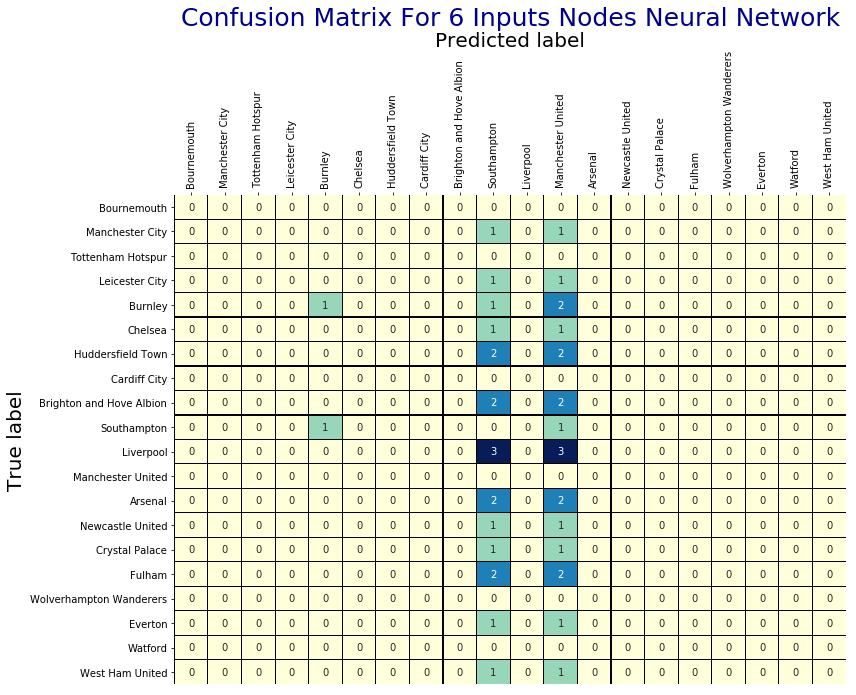

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns

y_true_6 = list(testing_6_data_label_1.argmax(1)) + list(testing_6_data_label_1.argmax(1))
y_pred_6 = list(model_6_pred[0].argmax(1)) + list(model_6_pred[1].argmax(1))

cm = confusion_matrix(y_true_6, y_pred_6,labels= list(teams_list_dict.keys())) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = list(teams_list_dict.values()), columns = list(teams_list_dict.values()))

plt.figure(figsize=(12,10))
ax_6 = sns.heatmap(cm_df, annot=True, cmap="YlGnBu", linewidths=.1, linecolor="black", cbar=False)
# coolwarm
ax_6.xaxis.tick_top()
ax_6.xaxis.set_label_position('top')
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.xticks(rotation=90)
plt.title("Confusion Matrix For 6 Inputs Nodes Neural Network", fontsize=25, color='darkblue')
# plt.show()
plt.tight_layout()
plt.subplots_adjust(top=0.70)
# plt.savefig("E:\\MS DA\\Major Project Nuig\\NN_6_confusion_matrix_3.png", facecolor='w', edgecolor='w', orientation='portrait')

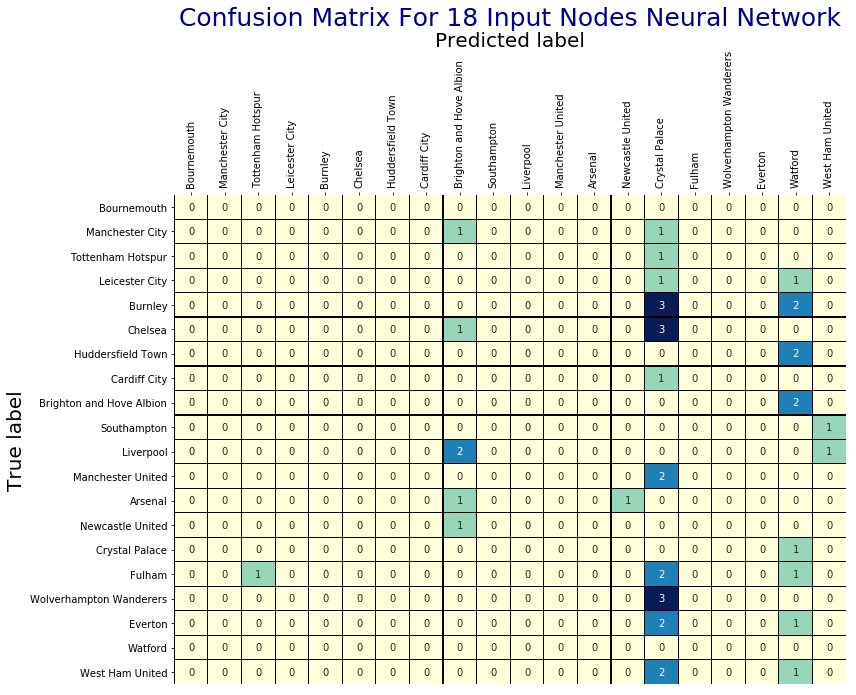

In [44]:
y_true_18 = list(testing_data_label_1.argmax(1)) + list(testing_data_label_2.argmax(1))
y_pred_18 = list(model_18_pred[0].argmax(1)) + list(model_18_pred[1].argmax(1))

cm = confusion_matrix(y_true_18, y_pred_18,labels= list(teams_list_dict.keys())) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = list(teams_list_dict.values()), columns = list(teams_list_dict.values()))

plt.figure(figsize=(12,10))
ax_18 = sns.heatmap(cm_df, annot=True, cmap="YlGnBu", linewidths=.1, linecolor="black", cbar=False)
# coolwarm
ax_18.xaxis.tick_top()
ax_18.xaxis.set_label_position('top')
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.xticks(rotation=90)
plt.title("Confusion Matrix For 18 Input Nodes Neural Network", fontsize=25, color='darkblue')
# plt.show()
plt.tight_layout()
plt.subplots_adjust(top=0.70)
# plt.savefig("E:\\MS DA\\Major Project Nuig\\NN_18_confusion_matrix_3.png", facecolor='w', edgecolor='w', orientation='portrait')